In [1]:
print("radha")

radha


In [3]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns;

% matplotlib inline


UsageError: Line magic function `%` not found.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

In [8]:
df = pd.read_csv("placement_outlier.csv")
print(df.shape)
print(df.isnull().sum())
print(df.isnull().mean()) # no null values
df.head()

(1000, 3)
cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64
cgpa                    0.0
placement_exam_marks    0.0
placed                  0.0
dtype: float64


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_18668\1964897102.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],hist=False, color="blue")
C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_18668\1964897102.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

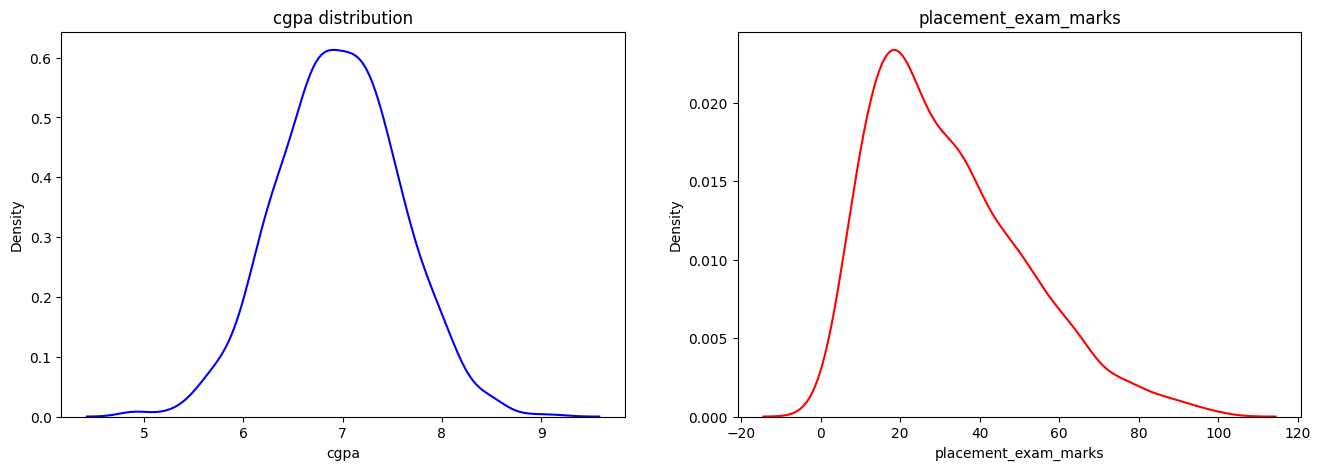

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df['cgpa'],hist=False, color="blue")
plt.title("cgpa distribution")

plt.subplot(122)
sns.distplot(df['placement_exam_marks'],hist=False, color="red")
plt.title("placement_exam_marks")

plt.show()

In [11]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [12]:
df.cgpa.skew()

np.float64(-0.014529938929314918)

In [13]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [14]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [16]:
# finding the boundary values
print("max cgpa allowed: ", df['cgpa'].mean() + 3*df['cgpa'].std())
print("min cgpa allowed: ", df['cgpa'].mean() - 3*df['cgpa'].std())

max cgpa allowed:  8.808933625397168
min cgpa allowed:  5.113546374602832


In [26]:
# if value is greater than max and less than min that is considered as outlier
cg_outliers = df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]
print(cg_outliers.shape)

(5, 3)


## **Trimming**

In [27]:
new_df = df.drop(cg_outliers.index)
print(new_df.shape)

(995, 3)


In [29]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [30]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [34]:
import math
math.ceil(df.cgpa_zscore.mean()),df.cgpa_zscore.std()

(0, np.float64(1.0))

In [31]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_18668\2628588383.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.cgpa_zscore,hist=False,color="red")


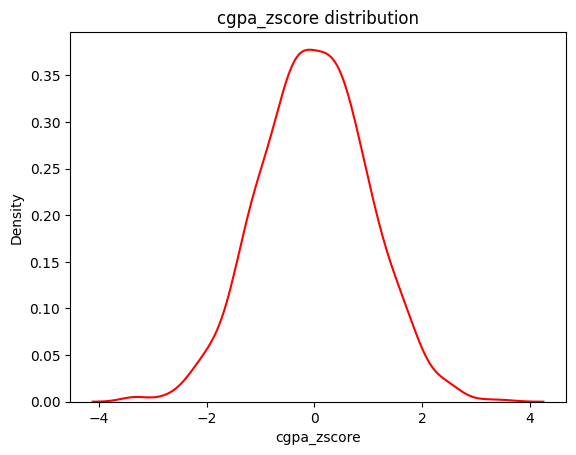

In [39]:
sns.distplot(df.cgpa_zscore,hist=False,color="red")
plt.title("cgpa_zscore distribution")
plt.show()

In [40]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [44]:
cg_outliers

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [42]:
df[(df['cgpa_zscore'] < -3) | (df.cgpa_zscore > 3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [45]:
new_df = df[(df['cgpa_zscore'] > -3) & (df['cgpa_zscore'] < 3)]
print(new_df.shape)

(995, 4)


## **capping**

In [46]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
upper_limit , lower_limit

(np.float64(8.808933625397168), np.float64(5.113546374602832))

In [49]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit , upper_limit , 
    np.where(df['cgpa'] < lower_limit , lower_limit , df['cgpa'])
)
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


In [57]:
df[df.cgpa > upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore
